## Métodos de Otimização: Método Híbrido

### Enxame de Partículas + Steepest_Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import random
import time
name = 'Método Híbrido' 
Start = time.time()

In [2]:
def f(x,nFunc,nVar,countFunc):
    f = open("var.dat", "w")
    f.write(str(nFunc)+"\n")
    f.write(str(nVar)+"\n")
    for i in range(0, len(x)):
        f.write(str(x[i])+'\n')
    f.close()
    
    result = os.system("funcao.exe")
    
    f = open("obj.dat", "r")
    u = float(f.read())
    f.close()
    countFunc += 1
    return u,countFunc

In [3]:
def grad(x,countFunc):
    epsilon = 1.e-10
    nFunc = 34; Qvar = 12
    
    for i in range(0,len(x)):
        xtmp=x.copy()
        xtmp[i]=xtmp[i]+epsilon
        F_xtmp, countFunc = f(xtmp,nFunc,Qvar,countFunc)
        F_x, countFunc = f(x,nFunc,Qvar,countFunc)
        G[i]=(F_xtmp-F_x)/epsilon
    
    return G,countFunc

In [4]:
nFunc = 34
Qvar = 12
Qtind = 100
kmax = 300
countFunc = 0

pop =np.zeros((Qtind,Qvar) , dtype = 'float')
x =np.zeros((Qtind,Qvar) , dtype = 'float')
fHist = []
fpop =np.zeros(Qtind , dtype = 'float')
fsol =np.zeros(Qtind , dtype = 'float')
pbest =np.zeros(Qvar , dtype = 'float')
xmin =np.zeros(Qvar , dtype = 'float')
xmax =np.zeros(Qvar , dtype = 'float')
r =np.zeros(Qvar , dtype = 'float')
r1 =np.zeros(Qvar , dtype = 'float')
r2 =np.zeros(Qvar , dtype = 'float')

for i in range(0, Qvar):
    xmin[i] = -100; xmax[i] = 100

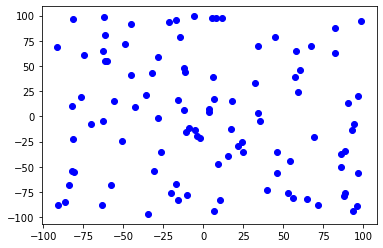

In [5]:
#criando a populacao inicial e suas funcoes objetivo
#o melhor individuo ja esta definido (pop == pi)

for i in range(0, Qtind):
    for j in range(0, Qvar):
        r[j] = random.random()
        pop[i,j] = xmin[j]+(1.-r[j])*(xmax[j]-xmin[j])
    fpop[i],countFunc = f(pop[i,:],nFunc,Qvar,countFunc)

plt.plot(pop[:,0], pop[:,1], 'bo')
plt.show()

In [6]:
minlocobj=np.argmin(fpop)
pbest[:]=pop[minlocobj,:]
fbest=fpop[minlocobj]
print(fbest)

5471249420221127.0


In [7]:
x=pop.copy()
layout = "{0:.5f}"
k=0; e = 1.e-3; count = 0; k_tot = 0
while k < kmax:
    k += 1
    k_tot +=1
    for i in range(0, Qtind):
        for j in range(0, Qvar):
            r1[j] = random.random()
            r2[j] = random.random()
            x[i,j] = x[i,j] + 2.*r1[j]*(pop[i,j]-x[i,j]) + 2.*r2[j]*(pbest[j]-x[i,j])
            x[i,j] = max(min(x[i,j],xmax[j]),xmin[j])

        fsol[i],countFunc = f(x[i,:],nFunc,Qvar,countFunc)
        
    for i in range(0, Qtind):
        if fsol[i] < fpop[i] :
            fpop[i]=fsol[i]
            pop[i,:]=x[i,:]
        
    minlocobj=np.argmin(fpop)
    pbest[:]=pop[minlocobj,:]
    fbest=fpop[minlocobj]
    for i in range(0, Qvar):
        print(layout.format(pbest[i]), end =" ")
    print(layout.format(fbest))
    fHist.append(fbest)
    for i in range(0, Qtind):
        if (np.abs(fbest-fpop[i]) <= e):
            count +=1 
    if count/Qtind >= 0.9:
        break
    

54.18735 27.26140 -100.00000 -51.47822 9.02803 -0.21874 -7.39507 -20.56775 -28.53810 -58.67494 -64.77930 -87.33274 463754944684480.00000
66.48014 18.51673 -100.00000 -45.09533 -13.93267 -4.26396 -23.26570 -21.55006 -50.44109 -80.46748 -72.48024 -87.23279 25002275160155.39844
100.00000 18.09434 -100.00000 -38.55707 -38.37571 7.09358 -23.48427 -49.69916 -61.33156 -81.35816 -72.00135 -87.23258 1398232998763.46997
100.00000 16.05622 -100.00000 -67.93023 -60.46474 4.63095 -32.94520 -80.69161 -55.86239 -68.69117 -76.93589 -85.84904 344542545380.63300
75.97981 15.46081 -99.22549 -57.03421 -79.37393 0.71783 -47.18910 -67.19191 -55.85989 -78.37148 -77.54222 -84.82580 141634131974.57199
76.40958 15.30797 -98.67728 -82.28857 -84.85387 -1.82991 -45.35103 -71.73453 -57.51635 -81.55501 -75.37814 -83.85588 74779075898.35500
72.22362 15.15811 -98.81574 -86.12655 -88.49405 -5.52452 -45.17755 -72.41143 -57.73985 -79.19018 -73.63645 -82.65982 48542092509.29480
87.04989 15.05241 -98.97277 -75.05884 -92.51

In [8]:
print(pbest[:])

[-36.62110672 -45.32098357 -51.86946085 -55.67732977 -59.02140968
 -63.02656875 -66.52153432 -69.15715615 -70.76033326 -73.89058115
 -75.65915845 -77.98666078]


In [9]:
nFunc = 34; Qvar = 12
alfa=0.1; kmax=50; k=0

xold =np.zeros(Qvar , dtype = 'float')
xnew =np.zeros(Qvar , dtype = 'float')
G =np.zeros(Qvar , dtype = 'float')

#chute incial:
for i in range(0, Qvar):
    xold[i] = pbest[i]
    
F0,countFunc = f(xold,nFunc,Qvar,countFunc)
layout = "{0:.5f}"
print(layout.format(xold[0])+" "+layout.format(xold[1])+" "+layout.format(F0))
fHist.append(F0)

while k < kmax:
    k += 1
    k_tot +=1
    # Calculo Gradiente
    G,countFunc = grad(xold,countFunc)
    
    # Processo iterativo
    xnew=xold-alfa*G
    
    #Atualiza xold
    xold = xnew.copy()
    
    #Calculo da função
    F,countFunc = f(xnew,nFunc,Qvar,countFunc)
    for i in range(0, Qvar):
        print(layout.format(xnew[i]), end =" ")
    print(layout.format(F))
    fHist.append(F)

-36.62111 -45.32098 3.22476
-36.72111 -45.27786 -51.61007 -55.67608 -59.02931 -63.02478 -66.27706 -69.00327 -70.76033 -73.77038 -75.65887 -77.91226 2.27072
-36.62111 -45.24336 -51.47521 -55.67486 -59.03652 -63.02304 -66.24609 -68.96948 -70.76033 -73.74315 -75.65858 -77.88768 2.01450
-36.72111 -45.21576 -51.38915 -55.67368 -59.04316 -63.02135 -66.22362 -68.94642 -70.76033 -73.72441 -75.65830 -77.87107 1.99805
-36.62110 -45.19368 -51.32852 -55.67252 -59.04929 -63.01970 -66.20601 -68.92887 -70.76033 -73.71004 -75.65801 -77.85843 1.88405
-36.72110 -45.17602 -51.28314 -55.67139 -59.05498 -63.01810 -66.19157 -68.91472 -70.76033 -73.69839 -75.65773 -77.84821 1.92495
-36.62109 -45.16189 -51.24773 -55.67028 -59.06028 -63.01654 -66.17936 -68.90288 -70.76033 -73.68860 -75.65745 -77.83962 1.83901
-36.72109 -45.15059 -51.21925 -55.66920 -59.06524 -63.01502 -66.16881 -68.89272 -70.76033 -73.68016 -75.65717 -77.83223 1.89528
-36.62109 -45.14155 -51.19580 -55.66815 -59.06990 -63.01354 -66.15954 -68.88

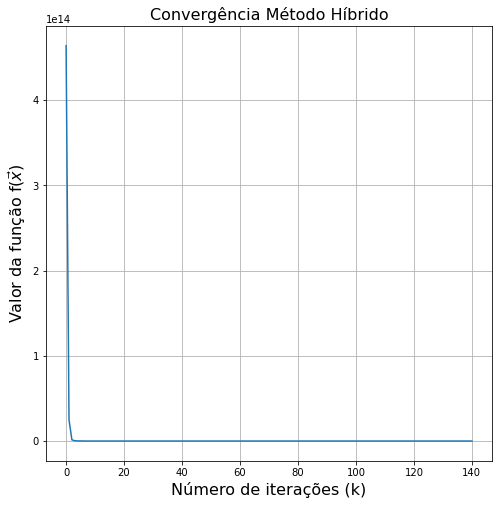

In [10]:
font = {
        'size': 16,
        }

plt.figure(figsize=(8,8))
plt.plot(np.arange(0,k_tot+1),fHist)
plt.grid()
plt.title(f'Convergência {name}', fontdict=font)
plt.ylabel(r'Valor da função f($\vec{x}$)', fontdict=font)
plt.xlabel("Número de iterações (k)", fontdict=font)
plt.show()

In [11]:
print("Quantidade de chamadas da função obj = ", countFunc)
End = time.time()
print("Tempo de Execução =", End-Start, "s")	

Quantidade de chamadas da função obj =  10351
Tempo de Execução = 215.39799284934998 s
